In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
movie_data = pd.read_csv("IMDB-Movies-Data.csv", encoding='ISO-8859-1')  

In [3]:
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
movie_data.shape

(15509, 10)

In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
movie_data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [9]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

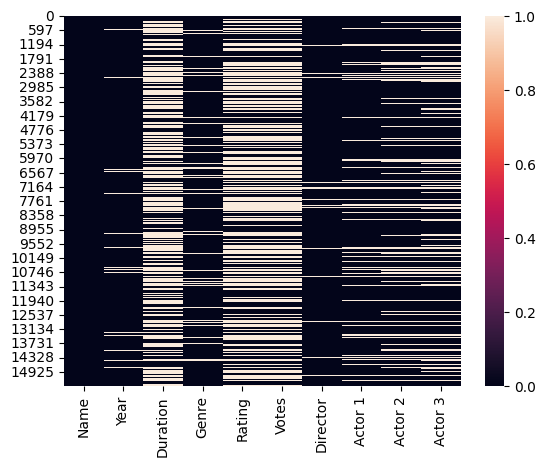

In [11]:
sns.heatmap(movie_data.isnull())

In [12]:
movie_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15504    False
15505    False
15506    False
15507    False
15508    False
Length: 15509, dtype: bool

In [13]:
movie_data.duplicated().sum()

np.int64(6)

In [22]:
movie_data.dropna

<bound method DataFrame.dropna of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (2005)  142 min   
8                      ?: A Question Mark  (2012)   82 min   
...                                   ...     ...      ...   
15493                              Zubaan  (2015)  115 min   
15494                            Zubeidaa  (2001)  153 min   
15503                     Zulm Ki Zanjeer  (1989)  125 min   
15505                               Zulmi  (1999)  129 min   
15508                        Zulm-O-Sitam  (1998)  130 min   

                           Genre  Rating  Votes         Director  \
1                          Drama     7.0      8    Gaurav Bakshi   
3                Comedy, Romance     4.4     35       Ovais Khan   
5         Comedy,

In [24]:
movie_data.drop_duplicates

<bound method DataFrame.drop_duplicates of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (2005)  142 min   
8                      ?: A Question Mark  (2012)   82 min   
...                                   ...     ...      ...   
15493                              Zubaan  (2015)  115 min   
15494                            Zubeidaa  (2001)  153 min   
15503                     Zulm Ki Zanjeer  (1989)  125 min   
15505                               Zulmi  (1999)  129 min   
15508                        Zulm-O-Sitam  (1998)  130 min   

                           Genre  Rating  Votes         Director  \
1                          Drama     7.0      8    Gaurav Bakshi   
3                Comedy, Romance     4.4     35       Ovais Khan   
5       

In [25]:
movie_data.shape

(5659, 10)

In [29]:
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [32]:
movie_data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659.000000,5659,5659,5659,5659,5659
unique,5385,91,174,376,NaN,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,NaN,90,41,104,52,57
mean,NaN,NaN,NaN,NaN,5.898533,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381165,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [35]:
movie_data['Year'].value_counts()

Year
(2019)    227
(2017)    211
(2018)    202
(2015)    177
(2016)    173
         ... 
(1931)      2
(1934)      2
(1939)      2
(1933)      1
(1932)      1
Name: count, Length: 91, dtype: int64

In [36]:
movie_data['Year'].value_counts().keys()

Index(['(2019)', '(2017)', '(2018)', '(2015)', '(2016)', '(2013)', '(2014)',
       '(2005)', '(2012)', '(2020)', '(2010)', '(2011)', '(2009)', '(2007)',
       '(2003)', '(2006)', '(2008)', '(2004)', '(2002)', '(2001)', '(1989)',
       '(1992)', '(1993)', '(1985)', '(2000)', '(1999)', '(1994)', '(1998)',
       '(1997)', '(1990)', '(1986)', '(1991)', '(1980)', '(1996)', '(1981)',
       '(1982)', '(1988)', '(1984)', '(1995)', '(2021)', '(1977)', '(1983)',
       '(1974)', '(1971)', '(1979)', '(1972)', '(1975)', '(1987)', '(1978)',
       '(1968)', '(1969)', '(1973)', '(1970)', '(1976)', '(1966)', '(1967)',
       '(1964)', '(1965)', '(1958)', '(1957)', '(1963)', '(1962)', '(1959)',
       '(1960)', '(1955)', '(1961)', '(1956)', '(1953)', '(1954)', '(1950)',
       '(1952)', '(1951)', '(1949)', '(1948)', '(1940)', '(1943)', '(1936)',
       '(1937)', '(1946)', '(1947)', '(1942)', '(1941)', '(1938)', '(1935)',
       '(1944)', '(1945)', '(1931)', '(1934)', '(1939)', '(1933)', '(1932)']

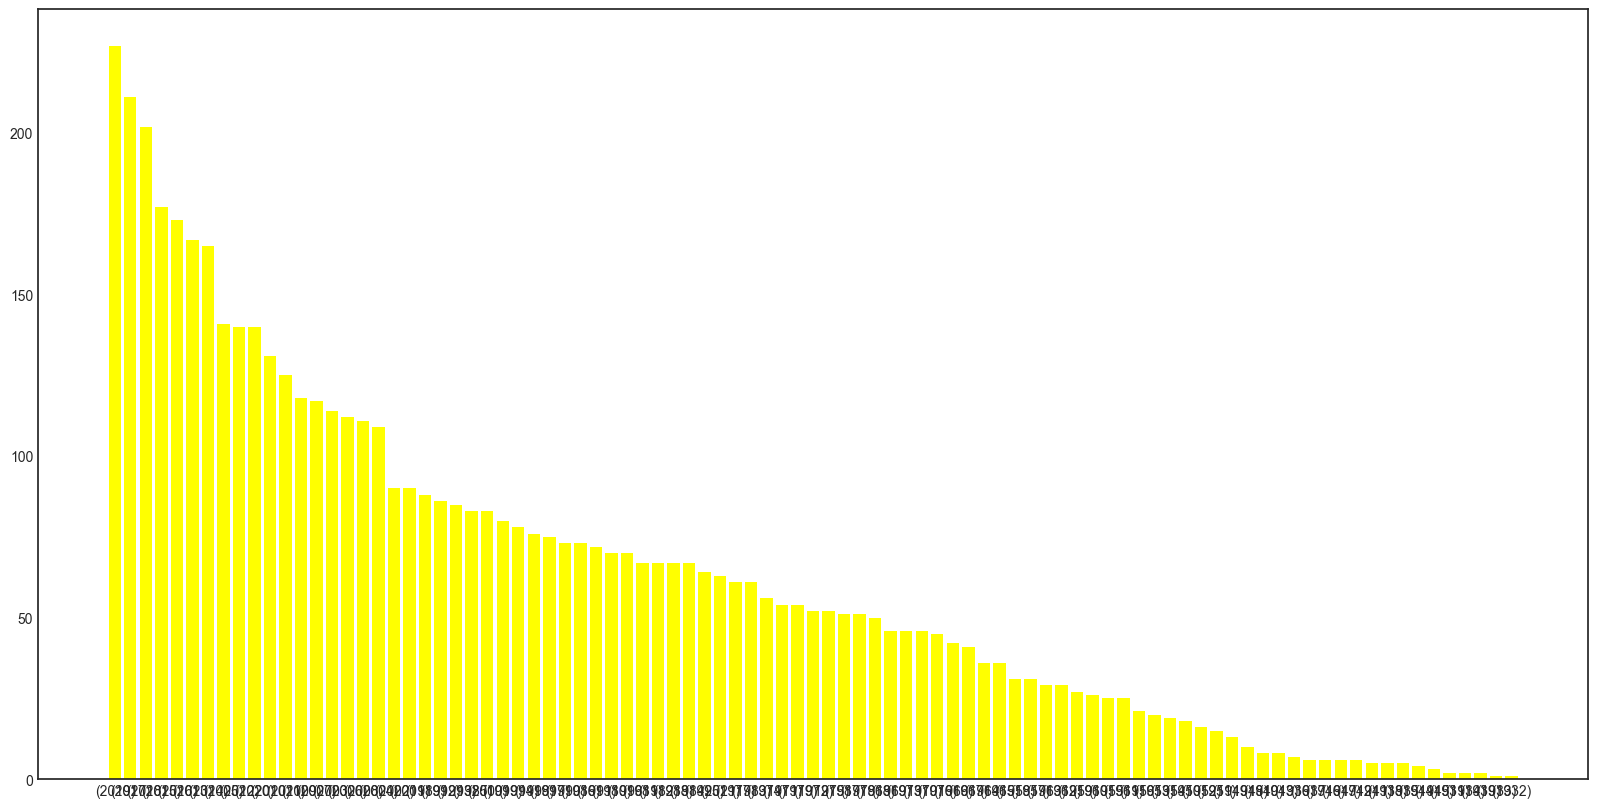

In [37]:
plt.figure(figsize=(20,10))
plt.bar(list(movie_data['Year'].value_counts().keys()),list(movie_data['Year'].value_counts()),color='yellow')
plt.show()

In [38]:
movie_data['Duration'].value_counts()

Duration
120 min    169
135 min    147
130 min    141
140 min    133
150 min    133
          ... 
204 min      1
235 min      1
217 min      1
61 min       1
250 min      1
Name: count, Length: 174, dtype: int64

In [39]:
movie_data['Duration'].value_counts().keys()

Index(['120 min', '135 min', '130 min', '140 min', '150 min', '137 min',
       '145 min', '136 min', '138 min', '139 min',
       ...
       '54 min', '238 min', '62 min', '67 min', '52 min', '204 min', '235 min',
       '217 min', '61 min', '250 min'],
      dtype='object', name='Duration', length=174)

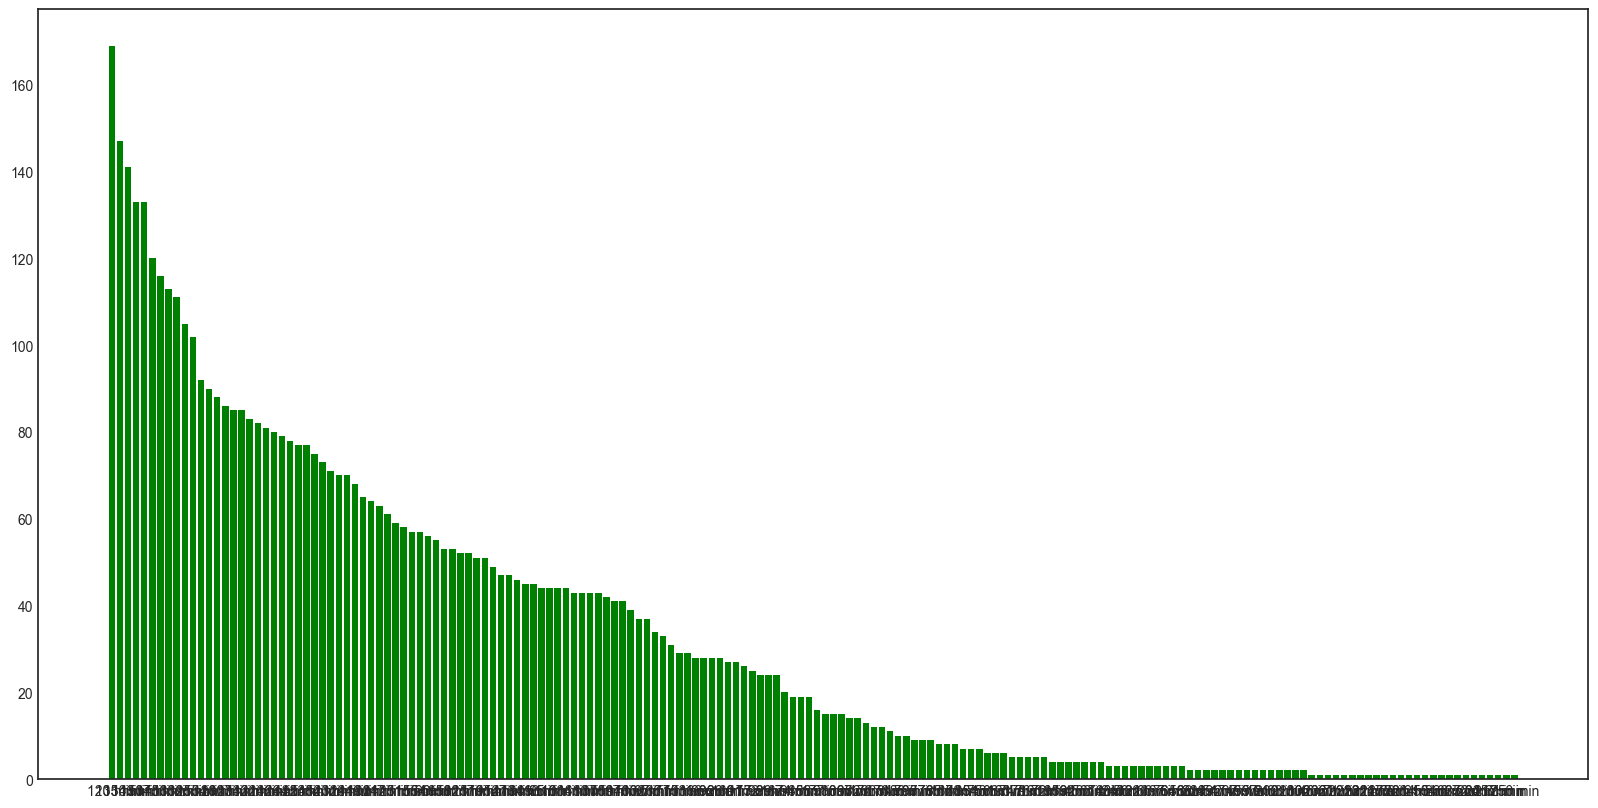

In [41]:
plt.figure(figsize=(20,10))
plt.bar(list(movie_data['Duration'].value_counts().keys()),list(movie_data['Duration'].value_counts()),color='green')
plt.show()

In [42]:
movie_data['Votes'].value_counts()

Votes
7        90
9        87
10       87
13       74
8        71
         ..
1,086     1
6,329     1
1,002     1
1,496     1
3,096     1
Name: count, Length: 2027, dtype: int64

In [43]:
movie_data['Votes'].value_counts().keys()

Index(['7', '9', '10', '13', '8', '11', '6', '12', '15', '17',
       ...
       '803', '8,588', '905', '3,955', '1,676', '1,086', '6,329', '1,002',
       '1,496', '3,096'],
      dtype='object', name='Votes', length=2027)

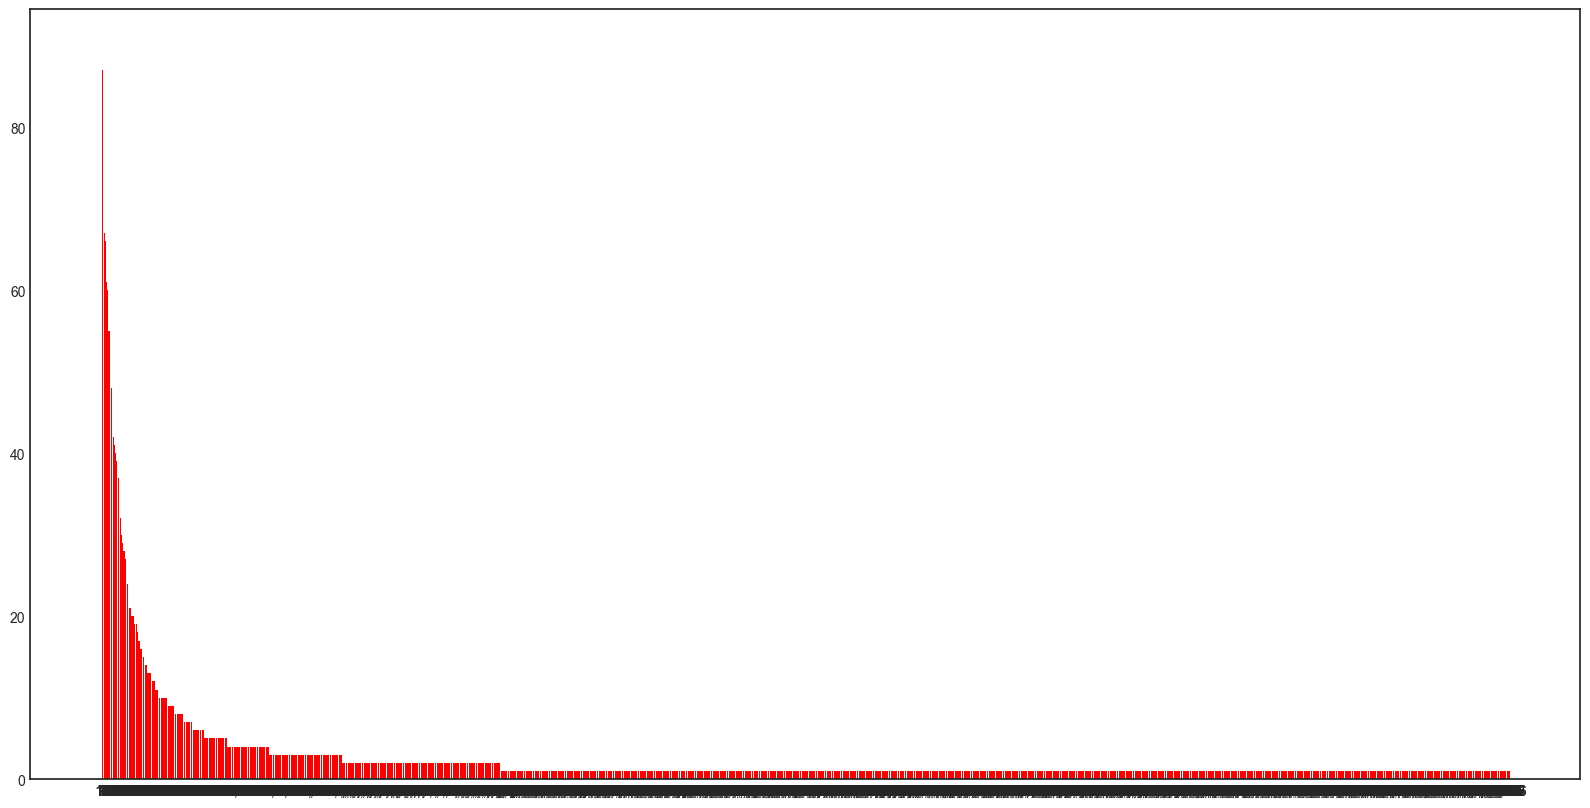

In [45]:
plt.figure(figsize=(20,10))
plt.bar(list(movie_data['Votes'].value_counts().keys()),list(movie_data['Votes'].value_counts()),color='red')
plt.show()

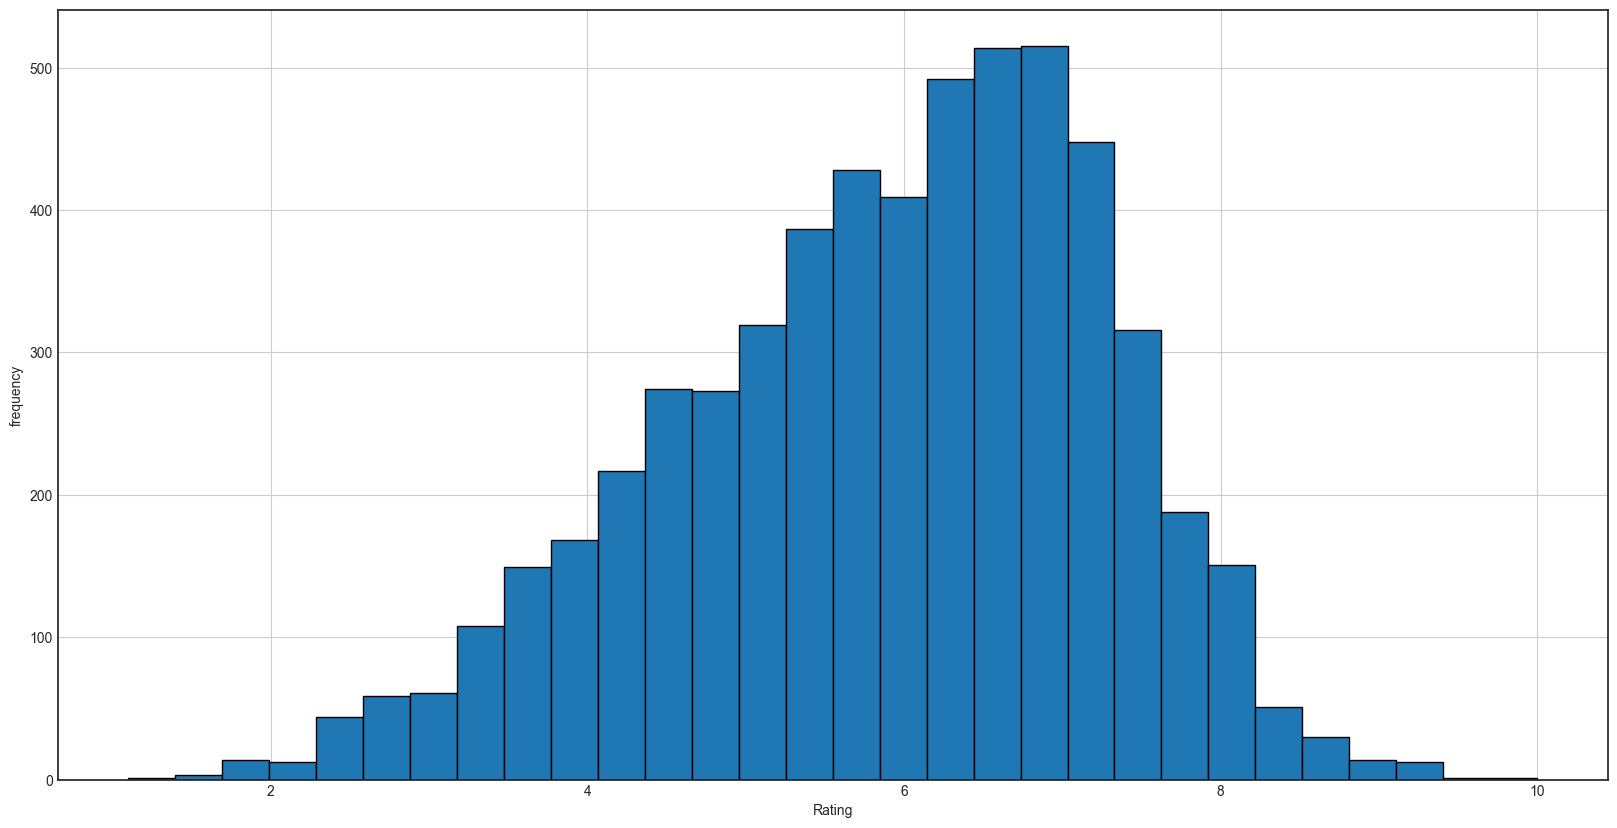

In [48]:
movie_data['Rating'].hist(bins=30, edgecolor='black',figsize=(20, 10))
plt.xlabel('Rating')
plt.ylabel('frequency')
plt.show()

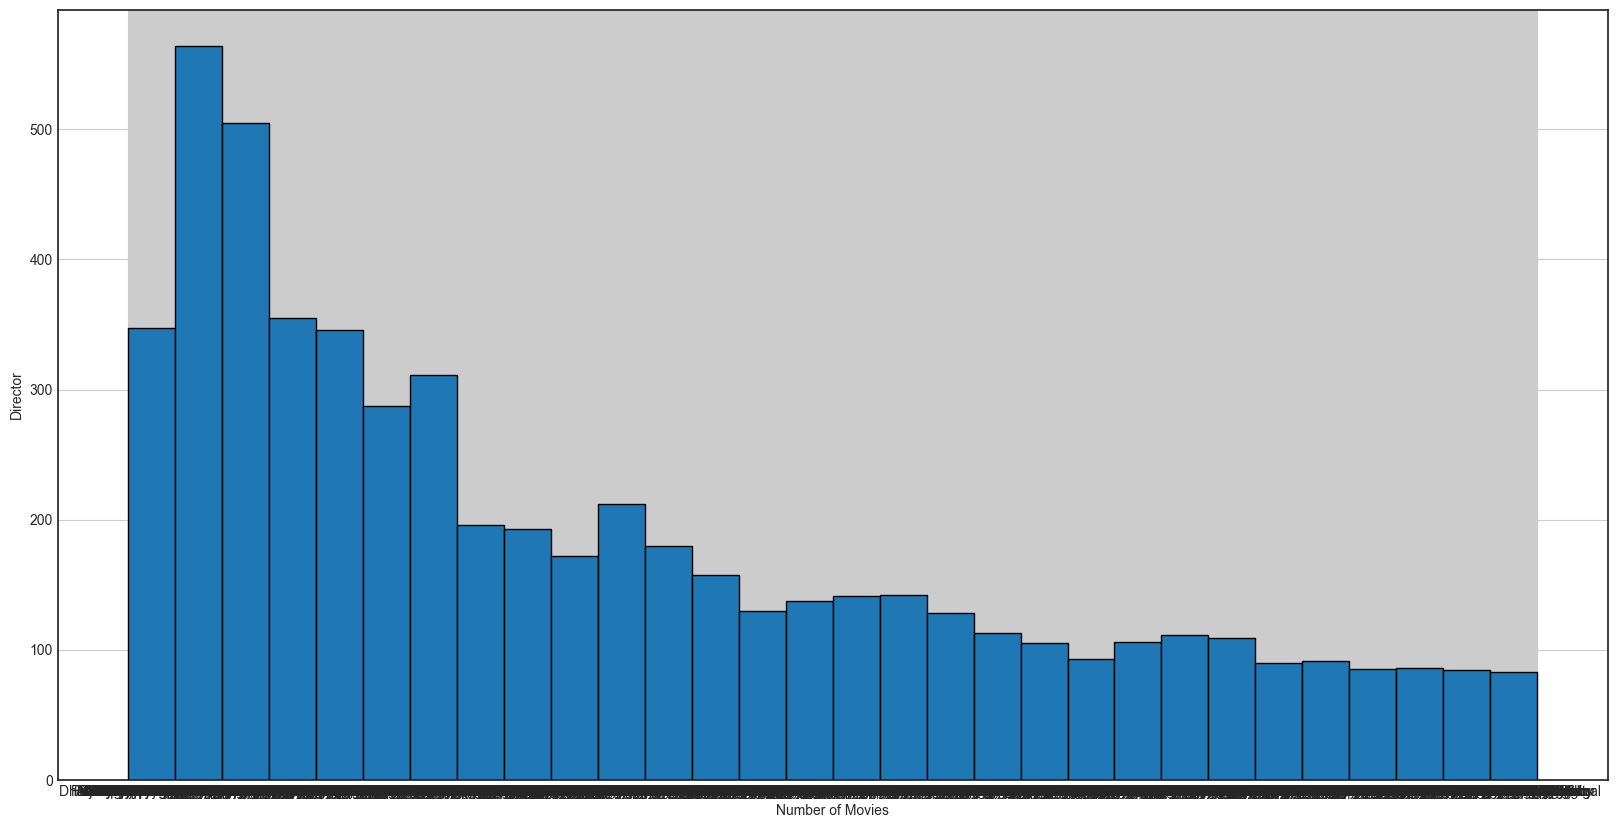

In [49]:
movie_data['Director'].hist(bins=30, edgecolor='black',figsize=(20, 10))
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [54]:
actors = pd.concat([movie_data['Actor 1'], movie_data['Actor 2'], movie_data['Actor 3']])

In [61]:
top_10_actors = actors.value_counts().head(10)

In [60]:
print(top_10_actors)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Name: count, dtype: int64


In [65]:
rating=movie_data.groupby('Year')['Rating'].mean()

In [66]:
rating.columns = ['Year', 'Average Rating']

In [69]:
print(rating.columns)

['Year', 'Average Rating']


In [70]:
print(rating.head())

Year
(1931)    5.75
(1932)    6.00
(1933)    6.20
(1934)    5.60
(1935)    5.70
Name: Rating, dtype: float64


In [77]:
high_rating_movies = movie_data[movie_data['Rating'] > 8.0]

In [78]:
high_rating_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
43,1971,(2007),136 min,"Action, Drama, War",8.1,"1,892",Amrit Sagar,Manoj Bajpayee,Ravi Kishan,Deepak Dobriyal
75,3 Idiots,(2009),170 min,"Comedy, Drama",8.4,"357,889",Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
137,A Billion Colour Story,(2016),105 min,Drama,8.1,412,Padmakumar Narasimhamurthy,Dhruva Padmakumar,Gaurav Sharma,Vasuki
173,A Wednesday,(2008),104 min,"Action, Crime, Drama",8.1,"75,118",Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
392,Aandhi,(1975),133 min,"Drama, Romance",8.1,"1,406",Gulzar,Suchitra Sen,Sanjeev Kumar,Om Shivpuri
...,...,...,...,...,...,...,...,...,...,...
15071,Win Marathon,(2018),94 min,"Drama, Sport",9.0,70,Aryan Neeraaj Anand,Shubhanshu Satyadeo,Aryan Neeraaj Anand,Ankita Bahuguna
15116,Writing with Fire,(2021),92 min,Documentary,8.1,106,Sushmit Ghosh,Rintu Thomas,Meera Devi,Shyamkali Devi
15288,Yeh Suhaagraat Impossible,(2019),92 min,Comedy,8.6,500,Abhinav Thakur,Preetika Chauhan,Aarav Mavi,Aloknath Pathak
15470,Zindagi Ek Safar,(1988),120 min,"Documentary, Biography, Musical",8.2,33,Sandip Ray,Kishore Kumar,Amitabh Bachchan,Asha Bhosle


In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtc = DecisionTreeClassifier()